## Datn Wrangling with Data Frames

In [15]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType, IntegerType
from pyspark.sql.functions import desc, asc
from pyspark.sql.functions import sum as Fsum

import datetime

import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt

In [16]:
path = "data/sparkify_log_small.json"

In [17]:
spark = SparkSession.builder.appName("Our first Spark SQl Example").getOrCreate()

In [18]:
user_log = spark.read.json(path)

In [19]:
user_log

DataFrame[artist: string, auth: string, firstName: string, gender: string, itemInSession: bigint, lastName: string, length: double, level: string, location: string, method: string, page: string, registration: bigint, sessionId: bigint, song: string, status: bigint, ts: bigint, userAgent: string, userId: string]

In [20]:
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [21]:
user_log.take(5)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstNa

In [22]:
user_log.describe("artist").show()

+-------+-----------------+
|summary|           artist|
+-------+-----------------+
|  count|             8347|
|   mean|            461.0|
| stddev|            300.0|
|    min|              !!!|
|    max|ÃÂlafur Arnalds|
+-------+-----------------+



In [23]:
user_log.count()

10000

In [24]:
user_log.select("page").drop_duplicates().sort("page").count()

13

In [25]:
user_log.select("page").drop_duplicates().sort("page").show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



In [26]:
user_log.select(['userId', 'firstname', "page", "song"]).where(user_log.userId == "1046").collect()

[Row(userId='1046', firstname='Kenneth', page='NextSong', song='Christmas Tears Will Fall'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Be Wary Of A Woman'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Public Enemy No.1'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Reign Of The Tyrants'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Father And Son'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='No. 5'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Seventeen'),
 Row(userId='1046', firstname='Kenneth', page='Home', song=None),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='War on war'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Killermont Street'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Black & Blue'),
 Row(userId='1046', firstname='Kenneth', page='Logout', song=None),
 Row(userId='1046', firstname='Kenneth'

In [27]:
get_hour = udf(lambda x : datetime.datetime.fromtimestamp(x / 1000.0).hour, IntegerType())

In [28]:
user_log = user_log.withColumn("hour", get_hour(user_log.ts))

In [29]:
user_log

DataFrame[artist: string, auth: string, firstName: string, gender: string, itemInSession: bigint, lastName: string, length: double, level: string, location: string, method: string, page: string, registration: bigint, sessionId: bigint, song: string, status: bigint, ts: bigint, userAgent: string, userId: string, hour: int]

In [30]:
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)
 |-- hour: integer (nullable = true)



In [31]:
user_log.select("hour").show()

+----+
|hour|
+----+
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
+----+
only showing top 20 rows



In [35]:
songs_in_hour = user_log.filter(user_log.page == "NextSong").groupBy(user_log.hour).count().orderBy(user_log.hour.cast("float"))

In [36]:
songs_in_hour.show()

+----+-----+
|hour|count|
+----+-----+
|   0|  337|
|   1|  255|
|   2|  271|
|   3|  307|
|   4|  377|
|   5|  371|
|   6|  505|
|   7|  410|
|   8|  320|
|   9|  341|
|  10|  319|
|  11|  306|
|  12|  344|
|  13|  395|
|  14|  324|
|  15|  185|
|  16|  236|
|  17|  238|
|  18|  285|
|  19|  418|
+----+-----+
only showing top 20 rows



In [37]:
songs_in_hour_pd = songs_in_hour.toPandas()

Text(0, 0.5, 'Songs Played')

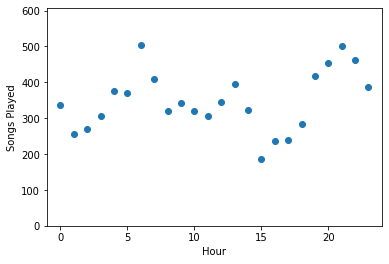

In [38]:
plt.scatter(songs_in_hour_pd["hour"], songs_in_hour_pd["count"])
plt.xlim(-1,24)
plt.ylim(0, 1.2* max(songs_in_hour_pd["count"]))
plt.xlabel("Hour")
plt.ylabel("Songs Played")

In [41]:
user_log_valid = user_log.dropna(how="any", subset = ["userId", "sessionId"])

In [42]:
user_log_valid.count()

10000

In [44]:
user_log.select("userId").dropDuplicates().sort("userId").show()

+------+
|userId|
+------+
|      |
|    10|
|   100|
|  1000|
|  1003|
|  1005|
|  1006|
|  1017|
|  1019|
|  1020|
|  1022|
|  1025|
|  1030|
|  1035|
|  1037|
|   104|
|  1040|
|  1042|
|  1043|
|  1046|
+------+
only showing top 20 rows



In [45]:
user_log_valid = user_log_valid.filter(user_log_valid["userId"] != "")

In [47]:
user_log_valid.count()

9664

In [48]:
user_log_valid.filter("page == 'Submit Downgrade'").show()

+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|artist|     auth|firstName|gender|itemInSession|lastName|length|level|            location|method|            page| registration|sessionId|song|status|           ts|           userAgent|userId|hour|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|  null|Logged In|    Kelly|     F|           24|  Newton|  null| paid|Houston-The Woodl...|   PUT|Submit Downgrade|1513283366284|     5931|null|   307|1513768454284|Mozilla/5.0 (Wind...|  1138|  16|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+


In [49]:
user_log.select(["userId", "firstName", "page", "level", "song"]).where(user_log.userId == "1138").collect()

[Row(userId='1138', firstName='Kelly', page='Home', level='paid', song=None),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Everybody Everybody'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Gears'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Use Somebody'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Love Of My Life (1993 Digital Remaster)'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Down In The Valley Woe'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Treat Her Like A Lady'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song="Everybody Thinks You're An Angel"),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Fourteen Wives'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Love On The Rocks'),
 Row(userId='1138', f

In [50]:
flag_downgrade_event = udf(lambda x : 1 if x == "Submit Downgrade" else 0, IntegerType())

In [51]:
user_log_valid = user_log_valid.withColumn("downgraded", flag_downgrade_event("page"))

In [52]:
user_log_valid.head(1)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour=3, downgraded=0)]

In [55]:
from pyspark.sql import Window

In [56]:
windowval = Window.partitionBy("UserId").orderBy(desc("ts")).rangeBetween(Window.unboundedPreceding, 0)